In [1]:
import os
import cv2
from math import ceil,sqrt
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import time
import math
import cmath
import sys
from scipy.ndimage import morphology as morph
from skimage.morphology import disk
IMAGES_FOLDER_PATH = "/content/drive/My Drive/Assignment_3/images"

##Question 2

In [2]:
def unite(a, linked):
    if linked[a] == a:
        return a
    else:
        linked[a] = unite(linked[a], linked)
        return linked[a]


def unionSet(a, b, linked):
    linked[unite(a, linked)] = unite(b, linked)


def connComponents(im):
    next_label = 1;
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h, w = im.shape
    for row in range(h):
        for column in range(w):
            if im[row, column] != 0:
                neighbors = []
                if row > 0:
                    if im[row-1][column] == im[row, column]:
                        neighbors.append((row-1, column))
                if row > 0 and column + 1 < im.shape[1]:
                    if im[row-1, column+1] == im[row, column]:
                        neighbors.append((row-1, column+1))
                if row > 0 and column > 0:
                    if im[row-1, column-1] == im[row, column]:
                        neighbors.append((row-1, column-1))
                if column > 0:
                    if (im[row, column-1] == im[row, column]):
                        neighbors.append((row, column-1))

                if len(neighbors) == 0:
                    linked.append(next_label)
                    labels[row, column] = next_label
                    next_label += 1
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[row, column] = min(L)
                    for label in L:
                        unionSet(label, labels[row, column], linked)
                        
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            if im[row, column] != 0:
                labels[row, column] = unite(labels[row, column], linked)
    return labels


Text(0.5, 1.0, 'connected components')

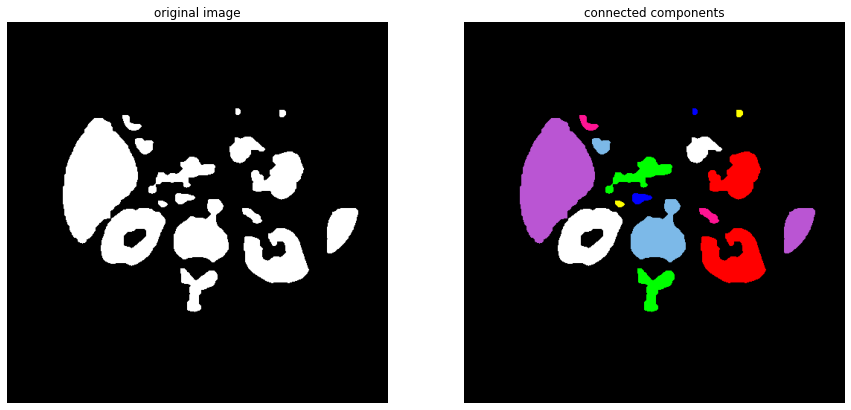

In [3]:
kidney = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "kidney.jpg") , cv2.IMREAD_GRAYSCALE)
kidney = (kidney > 132).astype(np.uint8)
kidney = cv2.morphologyEx(kidney, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6)))
kidney = cv2.morphologyEx(kidney, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
kidney = cv2.erode(kidney, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations = 3)
# plt.imshow(kidney,cmap='gray')
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255,20,147), (186,85,211), (255, 255, 255), (124,185,232), (196,98,16)]

output = np.zeros((kidney.shape[0], kidney.shape[1], 3))
conn = connComponents(kidney)
keys = np.unique(conn)
vals = list(range(1,len(keys) + 1))
dic = dict(zip(keys, vals))
for c in range(len(vals)):
    for i in range(kidney.shape[0]):
        for j in range(kidney.shape[1]):
            if conn[i][j] != 0:
                c = dic[conn[i][j]]
                # ccc = np.random.randint(0, 5)
                output[i][j][0] = colors[c % 8][0]
                output[i][j][1] = colors[c % 8][1]
                output[i][j][2] = colors[c % 8][2]
output = output.astype(np.uint8)
fig, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(kidney,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(output)
ax[1].axis('off')
ax[1].set_title('connected components')



##Question 3

In [4]:
sys.setrecursionlimit(100000)

def dfs(r, c):
    mov1 = [-1, 0, 1, 0]
    mov2 = [0, -1, 0, 1]
    for i in range(4):
        nr = r + mov1[i]
        nc = c + mov2[i]
        if nr < 0 or nc < 0 or nr >= img.shape[0] or nc >= img.shape[1] or img[nr][nc] == 0 or vis[nr][nc] != 0:
            continue
        else :
            # print(nr,nc)
            vis[nr][nc] = 1
            dfs(nr,nc)


Text(0.5, 1.0, 'coins touching the boundary of the image')

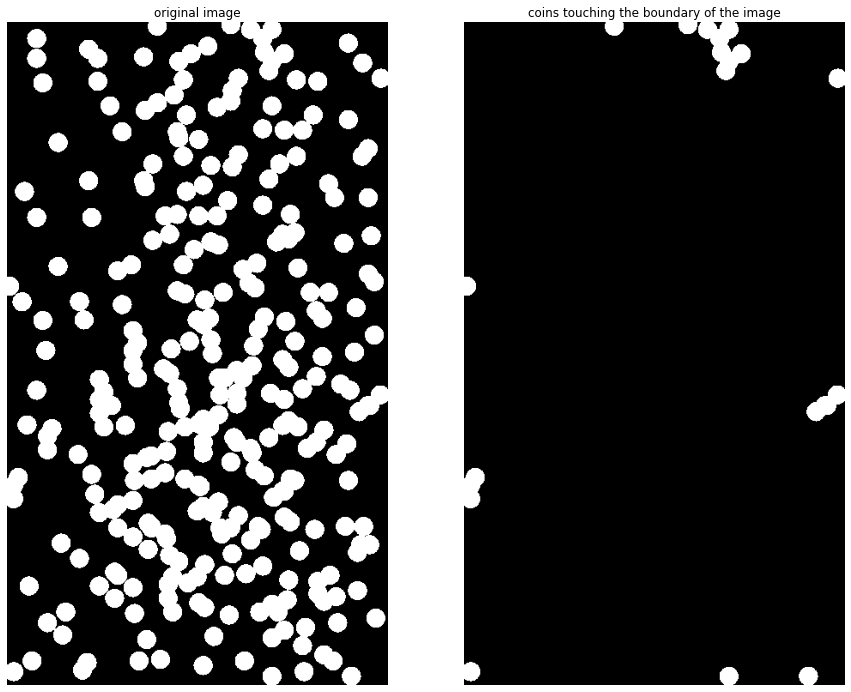

In [5]:
img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "coins.jpg") , cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)
vis = np.zeros(img.shape)
for i in range(img.shape[0]):
    if img[i][0] and vis[i][0] == 0:
        vis[i][0] = 1
        dfs(i,0)
for i in range(img.shape[1]):
    if img[0][i] and vis[0][i] == 0:
        vis[0][i] = 1
        dfs(0,i)
row,col = img.shape
for i in range(img.shape[1]):
    if img[row - 1][i] and vis[row - 1][i] == 0:
        vis[row - 1][i] = 1
        dfs(row - 1,i)
for i in range(img.shape[0]):
    if img[i][col - 1] and vis[i][col - 1] == 0:
        vis[i][col - 1] = 1
        dfs(i,col - 1)
# dfs(300,0)
fig, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(vis * 255,cmap='gray')
ax[1].axis('off')
ax[1].set_title('coins touching the boundary of the image')

In [6]:
def dfsOverlap(r, c,col):
    mov1 = [-1, 0, 1, 0]
    mov2 = [0, -1, 0, 1]
    sum = 1
    for i in range(4):
        nr = r + mov1[i]
        nc = c + mov2[i]
        if nr < 0 or nc < 0 or nr >= img.shape[0] or nc >= img.shape[1] or img[nr][nc] == 0 or visited[nr][nc] != 0:
            continue
        else :
            # print(nr,nc)
            visited[nr][nc] = col
            sum = sum + dfsOverlap(nr,nc,col)
    return sum


Text(0.5, 1.0, 'non-overlapping coins')

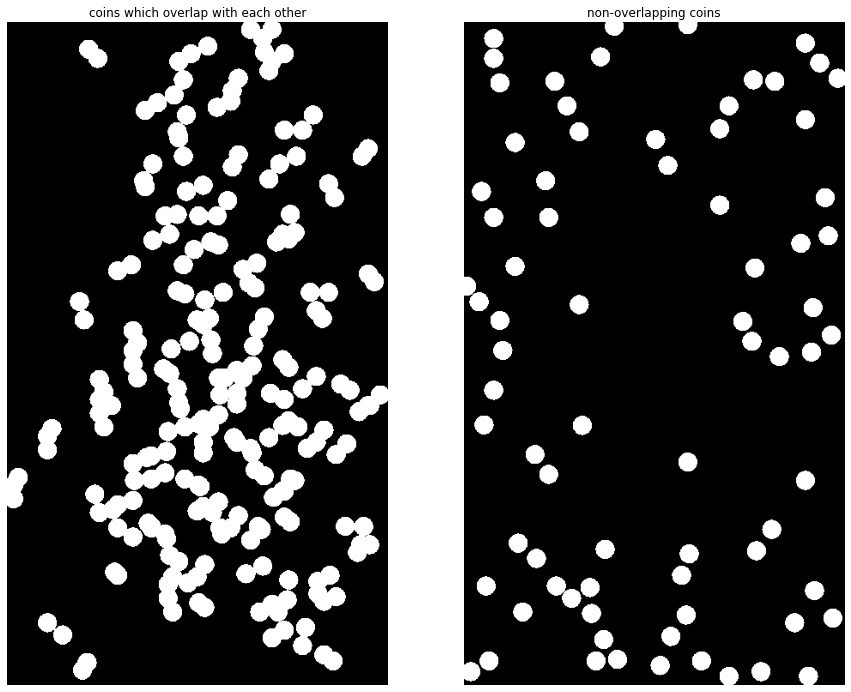

In [7]:
non_overlap_area = 450
color = 1
overlap_colors = {}
visited = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] == 0 and img[i][j] == 1:
            if dfsOverlap(i, j, color) > non_overlap_area:
                overlap_colors[color] = 1
            color += 1

over = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] in overlap_colors.keys():
            over[i][j] = 1

not_over = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] not in overlap_colors.keys() and img[i][j]:
            not_over[i][j] = 1

fig, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(over * 255,cmap='gray')
ax[0].axis('off')
ax[0].set_title('coins which overlap with each other')

ax[1].imshow(not_over * 255,cmap='gray')
ax[1].axis('off')
ax[1].set_title('non-overlapping coins')


##Question 4


In [8]:
bim = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "objects.png") , cv2.IMREAD_GRAYSCALE)
bim = np.array(bim, np.uint8)
bim[bim > 0] = 1
cl_bim = cv2.morphologyEx(bim, cv2.MORPH_CLOSE, np.ones((7, 9)))


In [9]:
sh = bim.shape
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)

def dfs(r, c,req):
    mov1 = [-1, 0, 1, 0]
    mov2 = [0, -1, 0, 1]
    for i in range(4):
        nr = r + mov1[i]
        nc = c + mov2[i]
        if nr < 0 or nc < 0 or nr >= req.shape[0] or nc >= req.shape[1] or req[nr][nc] == 0 or vis[nr][nc] != 0:
            continue
        else :
            # print(nr,nc)
            vis[nr][nc] = 1
            dfs(nr,nc,req)


###Part 1

Count of objects that have one or more holes: 6


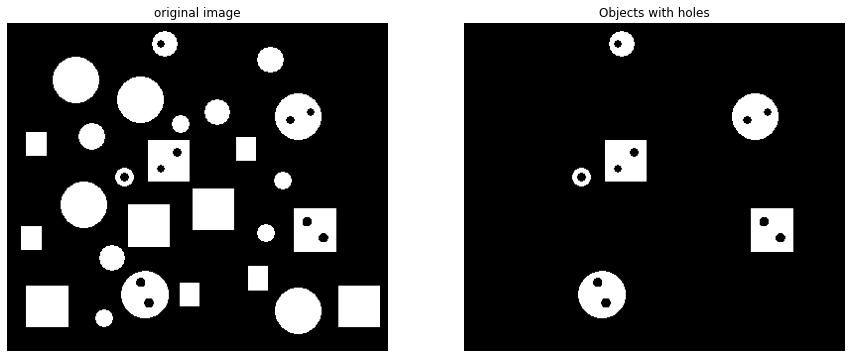

In [10]:
# For finding objects that have one or more holes, I have calculated a difference of closed and original image.
# To find the objects that had the holes I have done a dfs on the closed image for corresponding points. 
# To include the holes I have done a Logical 'AND' with the original image.

holes = cl_bim - bim
holes = cv2.morphologyEx(holes, cv2.MORPH_OPEN, np.ones((3, 3)))
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
c = 0
for i in range(sh[0]):
    for j in range(sh[1]):
        if holes[i][j] == 1:
            if vis[i][j] == 0:
                c += 1
            # print(i,j)
            dfs(i, j, cl_bim)
            
newim_holes = np.logical_and(vis, bim)
fig, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(bim,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(newim_holes,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Objects with holes')
print("Count of objects that have one or more holes: " + str(c))

## Part 2 and 3

Count of square objects in the image: 11


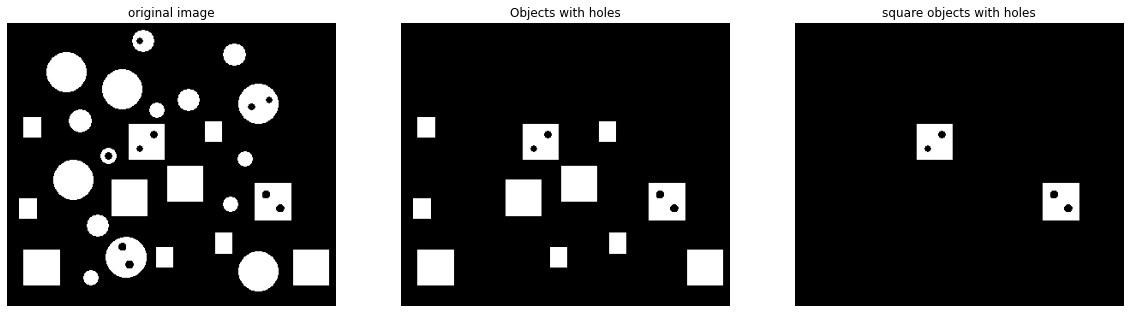

In [11]:

fil = np.array([[0, 0, 0],[1, 1, 0],[1, 1, 0]])
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
def conv(im, fil):
    newim = np.copy(im)
    im = np.pad(im, (1, 1), 'constant')
    for i in range(1, im.shape[0] - 1):
        for j in range(1, im.shape[1] - 1):
            part = im[i - 1: i + 2, j - 1: j + 2]
            f = 0
            for x in range(part.shape[0]):
                for y in range(part.shape[1]):
                    if part[x][y] != fil[x][y]:
                        f = 1
            if f == 0:
                newim[i - 1, j - 1] = 1
            else:
                newim[i - 1, j - 1] = 0
    return newim

c = 0
corners = conv(bim, fil)
for i in range(sh[0]):
    for j in range(sh[1]):
        if corners[i][j] == 1:
            if vis[i][j] == 0:
                c += 1
            dfs(i, j, bim)

newim_squares = vis

newim_sqs_and_holes = np.logical_and(newim_holes, newim_squares)
fig, ax = plt.subplots(1, 3,figsize=(20,20))
ax[0].imshow(bim,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(newim_squares,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Objects with holes')

ax[2].imshow(newim_sqs_and_holes,cmap='gray')
ax[2].axis('off')
ax[2].set_title('square objects with holes')
print("Count of square objects in the image: " + str(c))

###Part 4

Text(0.5, 1.0, 'circle objects without holes')

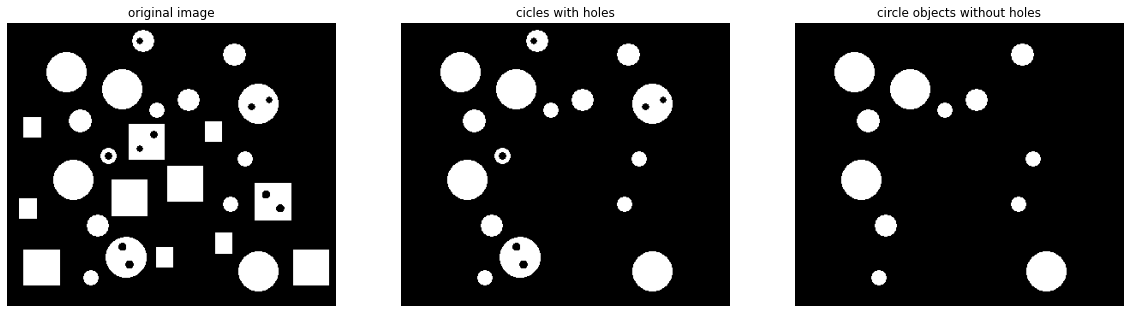

In [12]:
newim_circles = bim - newim_squares
newim_circles_holes = np.logical_and(newim_circles, newim_holes)
newim_circles_no_holes = newim_circles - newim_circles_holes

fig, ax = plt.subplots(1, 3,figsize=(20,20))
ax[0].imshow(bim,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(newim_circles,cmap='gray')
ax[1].axis('off')
ax[1].set_title('cicles with holes')

ax[2].imshow(newim_circles_no_holes,cmap='gray')
ax[2].axis('off')
ax[2].set_title('circle objects without holes')

##Question 5

In [13]:
def dfs8conn(r, c,req):
    mov1 = [-1, 0, 1, 0,1,-1,1,-1]
    mov2 = [0, -1, 0, 1,1,1,-1,-1]
    su = 1
    for i in range(8):
        nr = r + mov1[i]
        nc = c + mov2[i]
        if nr < 0 or nc < 0 or nr >= req.shape[0] or nc >= req.shape[1] or req[nr][nc] == 0 or vis[nr][nc] != 0:
            continue
        else :
            # print(nr,nc)
            vis[nr][nc] = 1
            su = su + dfs8conn(nr,nc,req)
    return su

[34, 74, 242, 24, 27]


Text(0.5, 1.0, 'components :27')

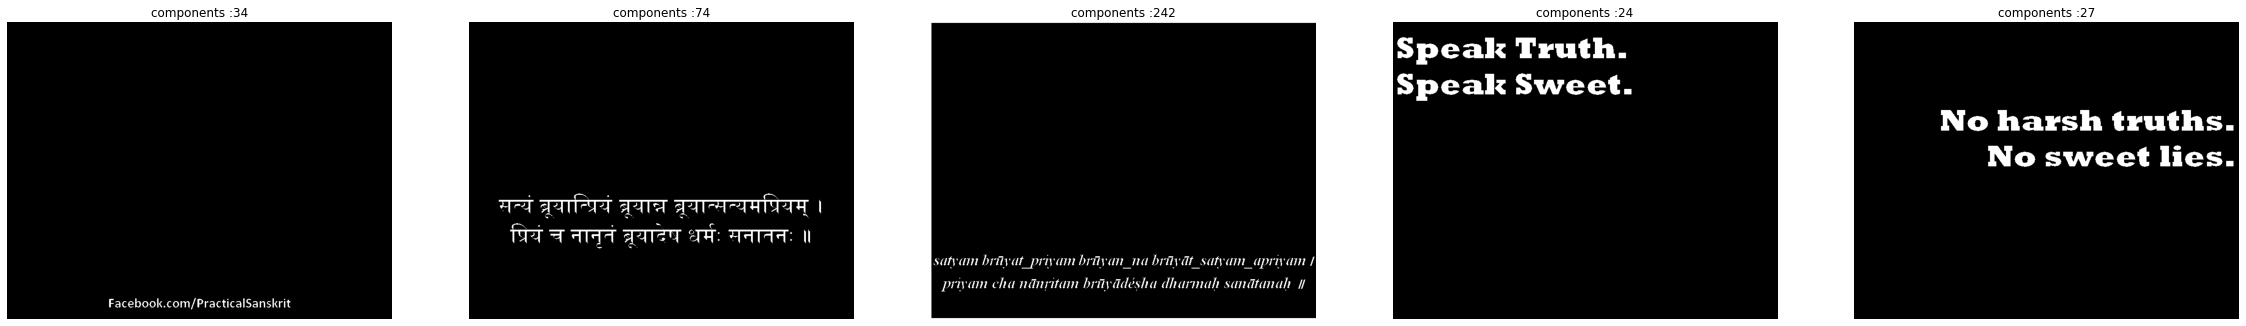

In [15]:
image =  cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "colourful_text.png"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[15:-15,15:-15]
im = np.copy(image)
rows, cols, channels = im.shape
color = []
mx_count = 0
im = np.reshape(im, [np.shape(im)[0] * np.shape(im)[1], 3])
color, counts = np.unique(im, axis=0, return_counts=True)
ind = counts.argsort()
clrs = color[ind][-6:][:5]
# print(clrs)
im = []
for i in range(5):
    im.append(np.zeros(image.shape[:2]))
for c in range(5):
    for i in range(im[c].shape[0]):
        for j in range(im[c].shape[1]):
            if (image[i][j] == clrs[c]).all():
                im[c][i][j] = 1


comps = []
for c in range(len(im)):
    ans = 0
    sh = im[c].shape
    vis = np.zeros(sh)
    newim = np.zeros(sh, np.uint)
    for i in range(im[c].shape[0]):
        for j in range(im[c].shape[1]):
            if(vis[i][j] == 0 and i > 0 and j > 0 and i < sh[0] and j < sh[1] and im[c][i][j] == 1):
                sz = dfs8conn(i, j, im[c])
                if sz > 0:
                    ans += 1
            
    comps.append(ans)

fig, ax = plt.subplots(1, 5,figsize=(40,40))
ax[0].imshow(im[0],cmap='gray')
ax[0].axis('off')
ax[0].set_title('components :{}'.format(comps[0]))
print(comps)
ax[1].imshow(im[1],cmap='gray')
ax[1].axis('off')
ax[1].set_title('components :{}'.format(comps[1]))

ax[2].imshow(im[2],cmap='gray')
ax[2].axis('off')
ax[2].set_title('components :{}'.format(comps[2]))

# fig1, ax1 = plt.subplots(1, 2,figsize=(20,20))
ax[3].imshow(im[3],cmap='gray')
ax[3].axis('off')
ax[3].set_title('components :{}'.format(comps[3]))

ax[4].imshow(im[4],cmap='gray')
ax[4].axis('off')
ax[4].set_title('components :{}'.format(comps[4]))

In [16]:
def dfs1(x, y, cl, req):
    c = 0
    if x < 0 or x >= sh[0] or y < 0 or y >= sh[1]:
        return c
    if vis[x][y] != 0:
        return c
    if req[x][y] == 0:
        return c
    vis[x][y] = 1
    newim[x, y] = cl
    mov1 = [-1, 0, 1, 0,1,-1,1,-1]
    mov2 = [0, -1, 0, 1,1,1,-1,-1]
    su = 1
    for i in range(4):
        nr = x + mov1[i]
        nc = y + mov2[i]
        su = su + dfs1(nr,nc,cl,req)
    return c + 1

In [17]:
im1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "tamil.jpeg"),0)
im1 = cv2.adaptiveThreshold(im1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,23,13)
im1 = (im1/255).astype(np.uint8)

im2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "telugu.jpeg"),0)
im2 = cv2.adaptiveThreshold(im2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,25,19)
im2 = (im2/255).astype(np.uint8)

sh2 = im[0].shape
vis2 = np.zeros(sh)
newim2 = np.zeros(sh, np.uint)
def dfs2(x, y, cl, req):
    c = 0
    if x < 0 or x >= sh2[0] or y < 0 or y >= sh2[1]:
        return c
    if vis2[x][y] != 0:
        return c
    if req[x][y] == 0:
        return c
    vis2[x][y] = 1
    newim2[x, y] = cl
    mov1 = [-1, 0, 1, 0]
    mov2 = [0, -1, 0, 1]
    su = 1
    for i in range(4):
        nr = x + mov1[i]
        nc = y + mov2[i]
        su = su + dfs2(nr,nc,cl,req)
    return su

Letters with one empty region: 31
Letters with two empty region: 18


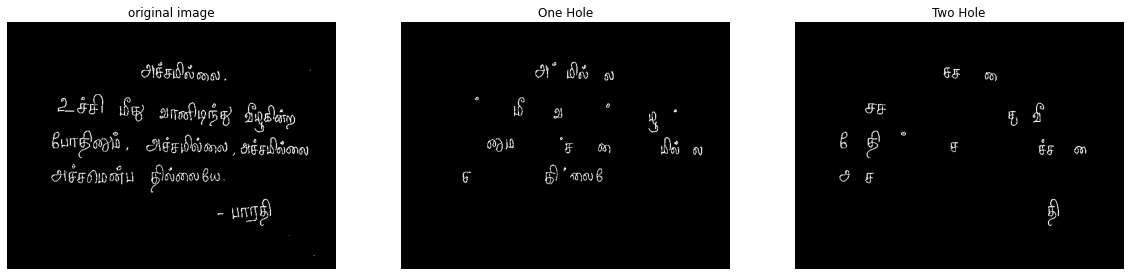

In [20]:
sh = im1.shape
vis = np.zeros(sh)
out_one = []
out_two = []
for i in range(sh[0]):
    for j in range(sh[1]):
        newim = np.zeros(sh, np.uint)
        c = dfs1(i, j,1, im1)
        if c > 0:
            tempim = newim
            temp2 = np.copy(1 - tempim)
            indexes = np.where(temp2 == 0)
            min_x = np.min(indexes[0])
            max_x = np.max(indexes[0])
            min_y = np.min(indexes[1])
            max_y = np.max(indexes[1])
            newim2 = temp2[min_x - 5:max_x + 5, min_y - 5: max_y + 5]
            sh2 = np.shape(newim2)
            vis2 = np.zeros(sh2)
            f = 0
            for x in range(sh2[0]):
                for y in range(sh2[1]):
                    c = dfs2(x, y, 1, newim2)
                    if c > 0:
                        f += 1
            if f == 2:
                out_one.append(indexes)
            elif f == 3:
                out_two.append(indexes)

holes_one = np.zeros(im1.shape)
for ind in out_one:
    holes_one[ind] = 1

holes_two = np.zeros(im1.shape)
for ind in out_two:
    holes_two[ind] = 1

fig, ax = plt.subplots(1, 3,figsize=(20,20))
ax[0].imshow(im1,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(holes_one,cmap='gray')
ax[1].axis('off')
ax[1].set_title('One Hole')

ax[2].imshow(holes_two,cmap='gray')
ax[2].axis('off')
ax[2].set_title('Two Hole')
print("Letters with one empty region: " + str(len(out_one)))
print("Letters with two empty region: " + str(len(out_two)))

Letters with one empty region: 43
Letters with two empty region: 9


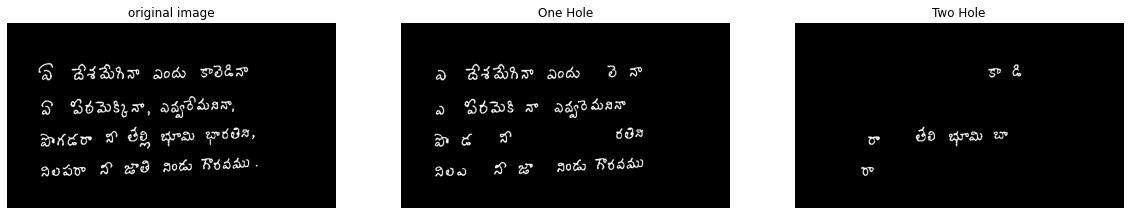

In [19]:
sh = im2.shape
vis = np.zeros(sh)
out_one = []
out_two = []
for i in range(sh[0]):
    for j in range(sh[1]):
        newim = np.zeros(sh, np.uint)
        c = dfs1(i, j,1, im2)
        if c > 0:
            tempim = newim
            temp2 = np.copy(1 - tempim)
            indexes = np.where(temp2 == 0)
            min_x = np.min(indexes[0])
            max_x = np.max(indexes[0])
            min_y = np.min(indexes[1])
            max_y = np.max(indexes[1])
            newim2 = temp2[min_x - 5:max_x + 5, min_y - 5: max_y + 5]
            sh2 = np.shape(newim2)
            vis2 = np.zeros(sh2)
            f = 0
            for x in range(sh2[0]):
                for y in range(sh2[1]):
                    c = dfs2(x, y, 1, newim2)
                    if c > 0:
                        f += 1
            if f == 2:
                out_one.append(indexes)
            elif f == 3:
                out_two.append(indexes)

holes_one = np.zeros(im2.shape)
for ind in out_one:
    holes_one[ind] = 1

holes_two = np.zeros(im2.shape)
for ind in out_two:
    holes_two[ind] = 1

fig, ax = plt.subplots(1, 3,figsize=(20,20))
ax[0].imshow(im2,cmap='gray')
ax[0].axis('off')
ax[0].set_title('original image')

ax[1].imshow(holes_one,cmap='gray')
ax[1].axis('off')
ax[1].set_title('One Hole')

ax[2].imshow(holes_two,cmap='gray')
ax[2].axis('off')
ax[2].set_title('Two Hole')
print("Letters with one empty region: " + str(len(out_one)))
print("Letters with two empty region: " + str(len(out_two)))

##Question 6

## How do we upscale by a factor k?

1. We first we create a new image with the new scaled dimensions filled with zeros.
2. Then, we do backward mapping for each pixel of the new image by dividing the x-coordinate with the scaling factor along the x direction and the y-coordinate by the scaling factor along the y direction.

**The main problem arises here**
- We can either choose some form of interpolation method or choose the neared integer value to location of the pixel intensity we want to choose from the original image.

- Suppose we choose an interpolation method (say averaging), we average over all the nearby pixel values, thus corrupting the label (we get a completely new label which never existed in the first place).

- If we choose nearest integer, we will obtain a label which is already existing thus ensuring that no new labels are created.


## How do we rotate by angle theta

1. We first we create a new image with the new dimensions filled with zeros.
2. Then, we do backward mapping for each pixel of the new image by multiplying a pixel location with the inverse of the transformation matrix.

**The main problem arises here**
- We can either choose some form of interpolation method or choose the neared integer value to location of the pixel intensity we want to choose from the original image.

- Suppose we choose an interpolation method (say averaging), we average over all the nearby pixel values, thus corrupting the label (we get a completely new label which never existed in the first place).

- If we choose nearest integer neighbour, we will obtain a label which is already existing thus ensuring that no new labels are created.


##Question 7

In [22]:
def rotImage(img,x,crop):
    rad=(np.pi*x)/180
    a,b=img.shape
    x0,y0=a//2-1,b//2-1
    if crop:
        rad=-rad
        new_img=np.zeros((a,b))
        for i in range(a):
            for j in range(b):
                x1=int(x0 +(i-x0)*np.cos(rad)+(j-y0)*np.sin(rad))
                y1=int(y0 -(i-x0)*np.sin(rad)+(j-y0)*np.cos(rad))
                if ((x1<a and x1>=0) and (y1>=0 and y1<b)):
                    new_img[i,j]=img[x1,y1]  
        return new_img
    else:
        co = np.abs(np.cos(rad))
        si = np.abs(np.cos(rad))
        X1 = int(x0 -(x0)*co+(-y0)*si)
        Y1 = int(y0 +(x0)*si+(b-1-y0)*co)
        X2 = int(x0 +(a-1-x0)*co+(b-1-y0)*si)
        Y2 = int(y0 -(a-1-x0)*si+(-y0)*co)
        k1 = abs(X1)
        k2 = abs(Y2)
        m = abs(X1)+abs(X2)
        n = abs(Y1)+abs(Y2)   
        T=np.array( [[np.cos(rad) , np.sin(rad), x0],
                     [-np.sin(rad), np.cos(rad), y0],
                     [           0,           0,  1]],dtype='float64')
        T1 = np.linalg.inv(T)       
        new_img = np.zeros((m,n))
        for i in range(m):
            for j in range(n):         
                X = np.array([[i-k1],[j-k2], [1]])
                tem = T1@X
                x1 = int(x0+tem[0])
                y1 = int(y0+tem[1])
                if (x1<a and x1>=0 and y1>=0 and y1<b):
                    new_img[i,j]=img[x1,y1]
        return new_img
    

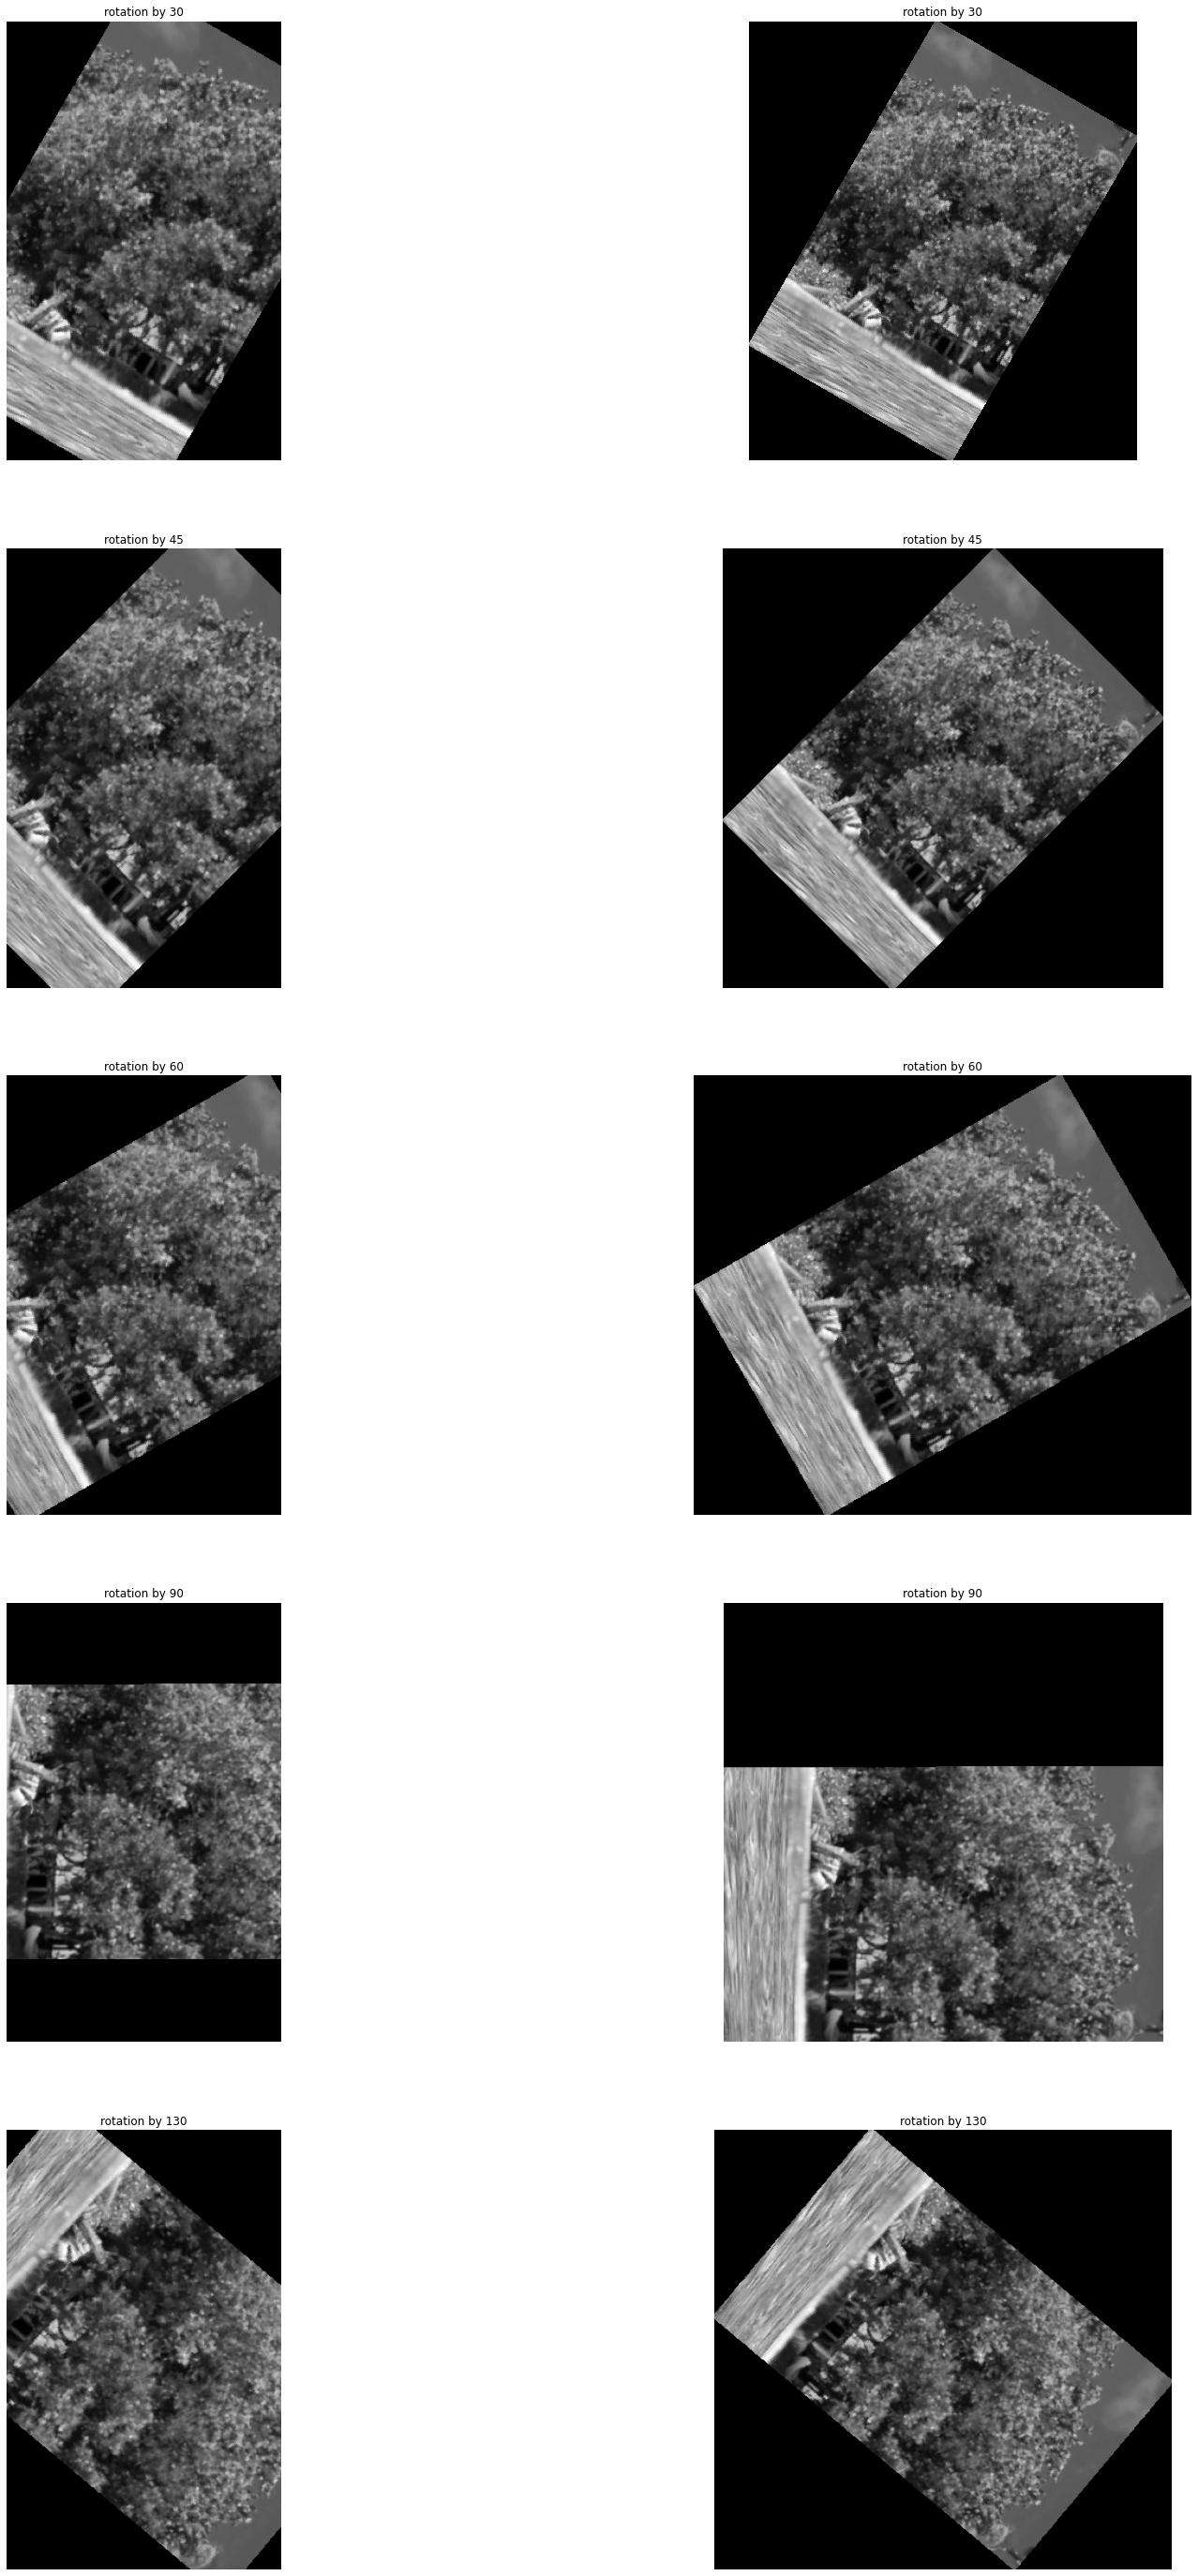

In [28]:
img =  cv2.imread(("/content/one024.jpg"),0)
# cv2_imshow()
img = img[300:700,200:450]
# cv2_imshow(rotImage(img,120,False))
angles = [30,45,60,90,130]
images = []
for angle in angles:
    images.append(rotImage(img,angle,True))
    images.append(rotImage(img,angle,False))

fig, ax = plt.subplots(5, 2,figsize=(28,50))
# fig.set_size_inches(18.5, 10.5)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(images[i*2 + j],cmap='gray')
        ax[i,j].axis('off')
        ax[i,j].set_title('rotation by {}'.format(angles[i]))